# WRANGLER

- *データ分析における WRANGLER という用語は、一般的にはデータを整理・加工・変換する作業を指します。*
- *データ分析において、データを解析しやすい形に整形し、必要な処理や分析を行うために、データの前処理やデータのクレンジング、データの変換などを行う作業を WRANGLER と呼ぶことがあります。*

- WRANGLER はもともとは牛追い人や馬追い人を指す英語の単語であり、牛や馬を取り扱い、整理する作業を行う人を指していました。データ分析の文脈では、データを整理し、必要な形に変換する作業が WRANGLER になぞらえられています。

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### データ読み込み

In [2]:
cardio_df = pd.read_csv('input_data/cardio.csv', index_col='id')
display(cardio_df.head())

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### 初手

In [3]:
# 統計量確認
cardio_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# 行列数
cardio_df.shape

(70000, 12)

In [5]:
# インフォ
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


### ヒストグラム

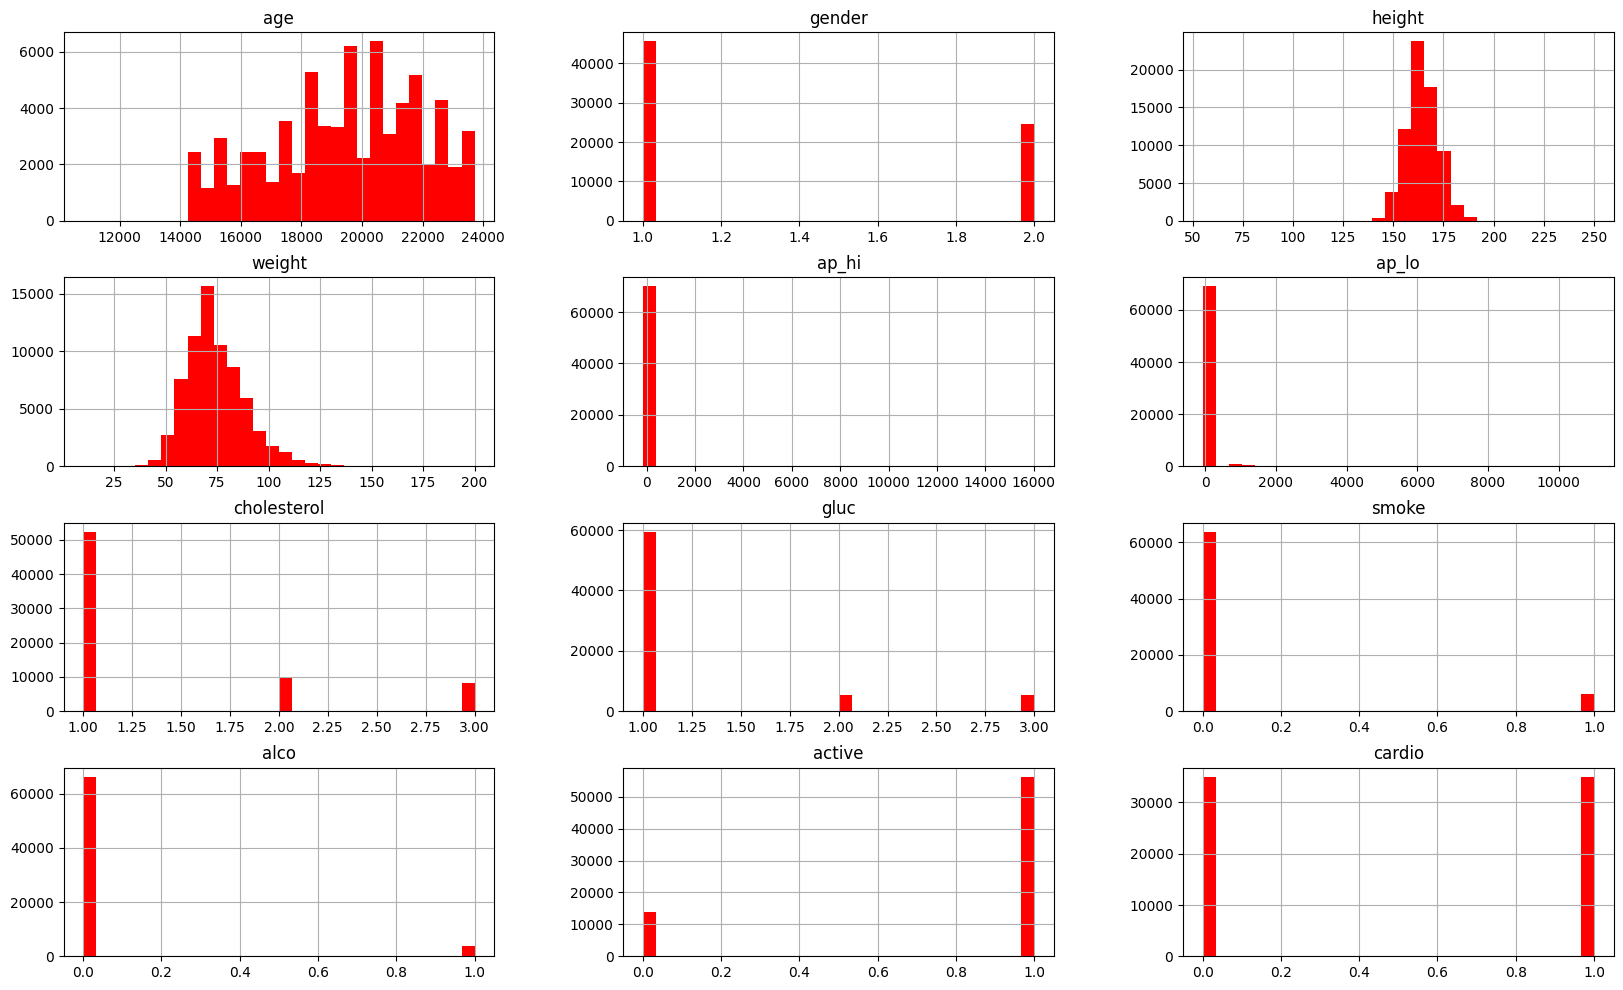

In [6]:
cardio_df.hist(bins = 30, figsize = (20,12), color = 'r');

#### 所見
- 欠損はなさそう
- データ型の変更も必要なさそう
- 「gender」のようなカテゴリデータが存在
- 「height」「weight」などの比例尺度が存在するので、回帰分析を行う場合は標準化の必要あり
- ageの値がおかしいので365日で割る

### 重複除去

In [7]:
cardio_df.drop_duplicates().shape

(69976, 12)

### 特徴量変換

In [8]:
# age の修正
cardio_df['age']=cardio_df['age']/365
cardio_df['age']=cardio_df['age'].round(0)

### 相関

<Axes: >

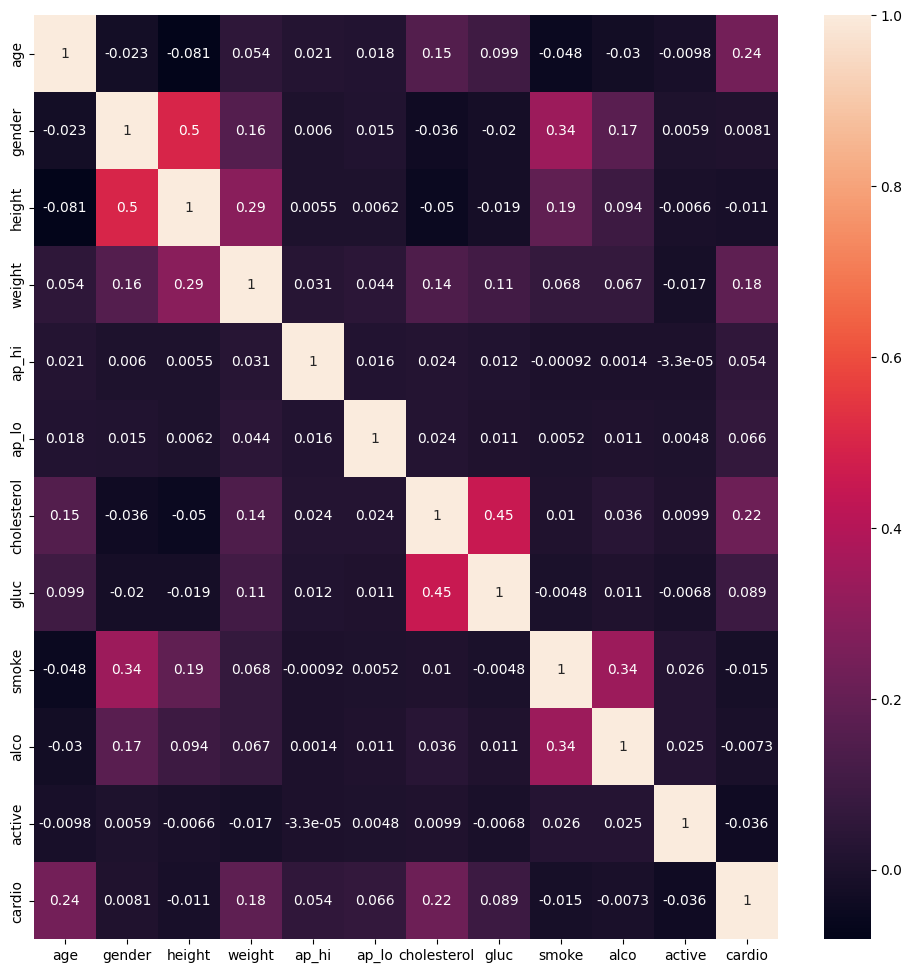

In [9]:
correlations = cardio_df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlations, annot = True)

### 散布図

<Figure size 1200x1200 with 0 Axes>

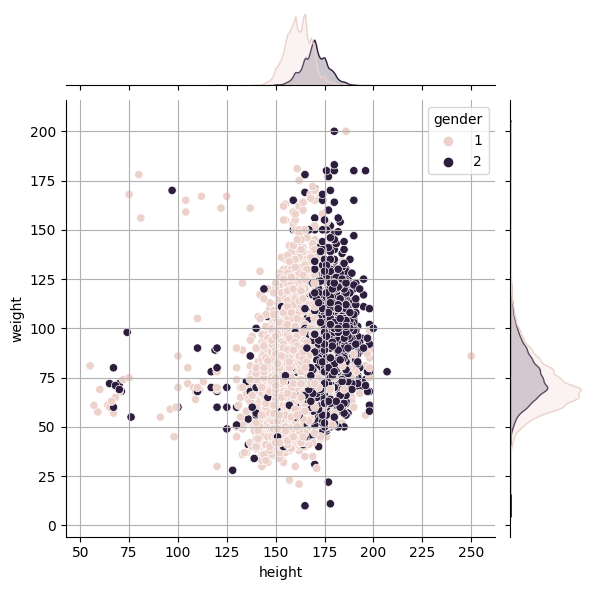

In [10]:
plt.figure(figsize=(12, 12))
sns.jointplot(x='height', y='weight', data=cardio_df, hue='gender')
plt.grid()

<Figure size 1200x1200 with 0 Axes>

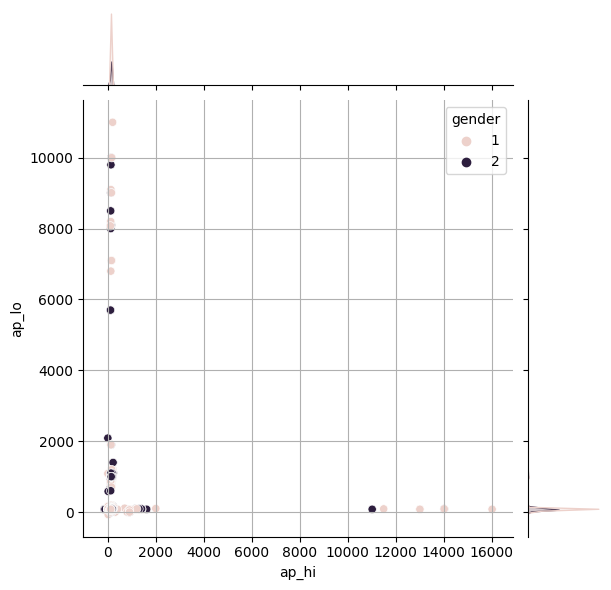

In [11]:
plt.figure(figsize=(12, 12))
sns.jointplot(x='ap_hi', y='ap_lo', data=cardio_df, hue='gender')
plt.grid()

### 外れ値

In [12]:
# 身長・体重の外れ値除外
cardio_df = cardio_df[cardio_df['height'].between(50, 200)]
cardio_df = cardio_df[cardio_df['weight'].between(25, 175)]
cardio_df.shape

(69981, 12)

In [13]:
# ap_hi, ap_loの外れ値除外
cardio_df = cardio_df[cardio_df['ap_hi'] <= 500]
cardio_df = cardio_df[cardio_df['ap_lo'] <= 4000]
cardio_df.shape

(69919, 12)

<Figure size 1200x1200 with 0 Axes>

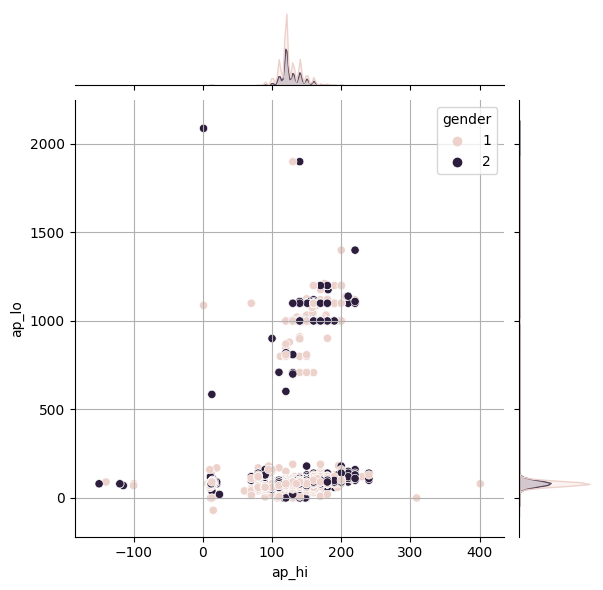

In [14]:
plt.figure(figsize=(12, 12))
sns.jointplot(x='ap_hi', y='ap_lo', data=cardio_df, hue='gender')
plt.grid()

### 正規化

In [15]:
scaler = MinMaxScaler()
scaler_array = scaler.fit_transform(cardio_df[['height', 'weight', 'ap_hi', 'ap_lo']])

In [16]:
scaler_cardio_df = pd.DataFrame(scaler_array, columns = ['height', 'weight', 'ap_hi', 'ap_lo'])

In [17]:
scaler_cardio_df = pd.concat([scaler_cardio_df, cardio_df.drop(['height', 'weight', 'ap_hi', 'ap_lo'], axis=1)], axis=1)
scaler_cardio_df.head()

,height,weight,ap_hi,ap_lo,age,gender,cholesterol,gluc,smoke,alco,active,cardio
0,0.779310,0.231293,0.471869,0.069509,50.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.696552,0.387755,0.526316,0.074143,55.0,1.0,3.0,1.0,0.0,0.0,1.0,1.0
2,0.758621,0.244898,0.508167,0.064875,52.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0
3,0.786207,0.367347,0.544465,0.078777,48.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0
4,0.696552,0.190476,0.453721,0.060241,48.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


### ワンホットエンコーディング

In [18]:
gender_df = pd.get_dummies(cardio_df['gender'])
gender_df.columns = ['male', 'female']

In [19]:
scaler_cardio_df = pd.concat([scaler_cardio_df.drop('gender', axis=1), gender_df], axis=1)
scaler_cardio_df.head()

,height,weight,ap_hi,ap_lo,age,cholesterol,gluc,smoke,alco,active,cardio,male,female
0,0.779310,0.231293,0.471869,0.069509,50.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.696552,0.387755,0.526316,0.074143,55.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.758621,0.244898,0.508167,0.064875,52.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.786207,0.367347,0.544465,0.078777,48.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
4,0.696552,0.190476,0.453721,0.060241,48.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
